### (a) $\mu=0.5$, because this is an equal probability event

## --------------------------------------------------------------------------------------------------

### (b) Recurring the scene according to the requirements of the subject requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

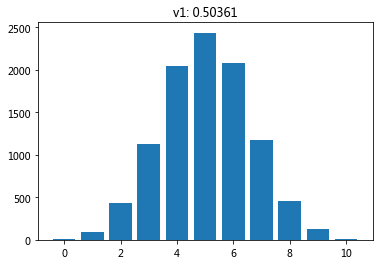

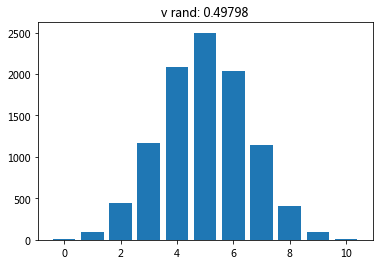

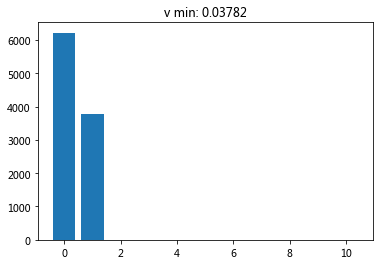

In [2]:
def scene(n):
    """
    n: The number of coins
    1: Positive
    0: Negative
    return: Number of positive coins
    """
    X = np.random.randint(0, 2, (n, 10))
    X1 = np.sum(X, axis=1)
    y1 = X1[0]
    y2 = X1[np.random.randint(0, n)]
    y3 = np.min(X1)
    return y1, y2, y3

Y1 = [0]*11
Y2 = [0]*11
Y3 = [0]*11

n = 1000  ## all coins
m = 10000  ## times

for i in range(m):
    y1, y2, y3 = scene(n)
    Y1[y1] += 1
    Y2[y2] += 1
    Y3[y3] += 1

def total(x):
    """
    The times of positive
    """
    s = 0
    for i in range(len(x)):
        s += i*x[i]
    return s

t = m * 10

plt.bar(range(11),Y1)
plt.title(u'v1: '+str(total(Y1) / t))
plt.show()
plt.bar(range(11),Y2)
plt.title(u'v rand: '+str(total(Y2) / t))
plt.show()
plt.bar(range(11),Y3)
plt.title(u'v min: '+str(total(Y3) / t))
plt.show()

## --------------------------------------------------------------------------------------------------

### (c) According to (b), we can estimate $P||v-\mu|>\epsilon|$ by below codes: 

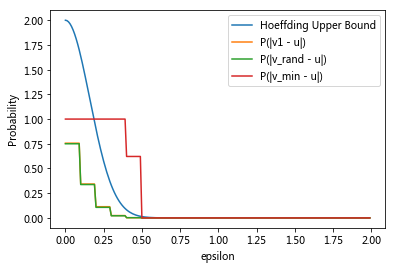

In [3]:
epsilon = np.arange(0, 2, 0.01)
size = epsilon.shape[0]
Z1 = np.zeros(size)
Z2 = np.zeros(size)
Z3 = np.zeros(size)

for i in range(size):
    for j in range(11):
        if abs((j - 5) / 10.0) > epsilon[i]:
            Z1[i] += Y1[j]
            Z2[i] += Y2[j]
            Z3[i] += Y3[j]
Z1 = Z1 / m
Z2 = Z2 / m
Z3 = Z3 / m
# Hoeffding upper
Z = np.array([2 * np.exp(-2*(i**2)*10) for i in epsilon])

plt.plot(epsilon, Z, label=u"Hoeffding Upper Bound")
plt.plot(epsilon, Z1, label=u"P(|v1 - u|)")
plt.plot(epsilon, Z2, label=u"P(|v_rand - u|)")
plt.plot(epsilon, Z3, label=u"P(|v_min - u|)")
plt.xlabel(u'epsilon')
plt.ylabel(u'Probability')
plt.legend()
plt.show()

## --------------------------------------------------------------------------------------------------

### (d) $v_{min}$ obey the Hoeffding bound
###  $v_1, v_{rand}$ are equivalent by symmetry, and we can see that $P[|v_{min}-\mu|>\epsilon]$ is larger than oeffding Upper Bound from the above figure in (c), so $v_{min}$ obey the Hoeffding bound.

## --------------------------------------------------------------------------------------------------

### (e) 
### We can use the following inequality to calculate $v_{min}$ , and M=1000
$P[|E_{in}(g)-E{out}(g)|>\epsilon] <= 2Me^{-2 \epsilon^2 N}$